# Solving Linear Systems
This follows the notes in https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf

## 1. Using Gradient Descent

Assume our linear system is given by $$A x = b$$

To solve it using gradient descent, we can first transform the system into its **quadratic form**: $$ f(x) = \frac{1}{2} x^T A x - x^T b $$

The gradient of $f(x)$ is: $$ \nabla f (x) = \frac{1}{2} (A^T + A) x - b $$

When $A$ is symetric, then the gradient is $$ \nabla f(x) = Ax - b $$ and this gradient is zero when $Ax = b$. Meaning that minimizing $f(x)$, is equivalent to solving the linear system.

An optimal step size can be computed analytically as: $$ \alpha = \frac{\nabla f^T \nabla f}{\nabla f^T A \nabla f} $$

In [1]:
import numpy as np

A = np.array([
    [3., 2.],
    [2., 6.],
])

b = np.array([2., -8.])

solution = np.linalg.solve(A, b)
print("Solution is:", solution)

Solution is: [ 2. -2.]


In [2]:
def is_pd(matrix) -> bool:
    es = np.linalg.eigvals(A)
    print("eigenvalues:", es)
    return es.min() >= 0.0

assert is_pd(A)

eigenvalues: [2. 7.]


In [3]:
A @ solution - b

array([0., 0.])

In [4]:
import matplotlib.pyplot as plt

In [5]:
def f(x):
    return 0.5 * (x.T @ A @ x) - (x @ b)

def grad_f(x):
    return A @ x - b

def opt_alpha(grad):
    return grad.T @ grad / (grad.T @ A @ grad)

f(solution)

np.float64(-10.0)

Plot the landscape of $f(x)$:

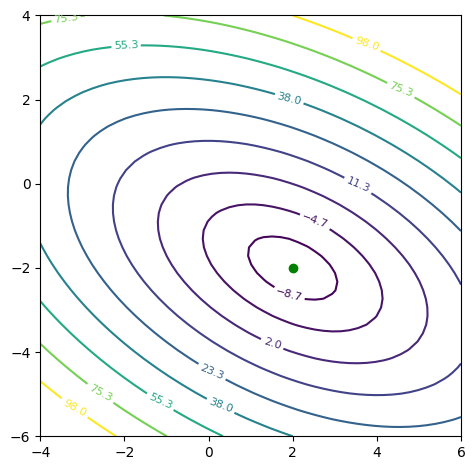

In [6]:
def plot_loss():
    x1s = np.linspace(-4, 6)
    x2s = np.linspace(-6, 4)
    X1, X2 = np.meshgrid(x1s, x2s)
    Z = np.array([f(pair) for pair in np.array([X1.flatten(), X2.flatten()]).T]).T.reshape(X1.shape)
    
    fig, ax = plt.subplots()
    CS = ax.contour(X1, X2, Z, levels=[f(np.array([solution[0], y])) for y in np.linspace(solution[1], 4, 10)])
    ax.scatter(*solution, color="green")
    ax.clabel(CS, inline=True, fontsize=8)
    fig.tight_layout()
    ax.set_aspect("equal", "box")
    return fig

plot_loss()
plt.show()

### Find the solution with minimization

In [7]:
worst_case = np.array([-3, 3])
x = worst_case
xs = [x]
grads = []
for _ in range(10):
    grad = grad_f(x)
    grads.append(grad)
    alpha = opt_alpha(grad=grad)
    x = x - alpha * grad
    xs.append(x)
    print("loss:", f(x))
xs = np.array(xs)
grads = np.array(grads)

loss: 8.975903614457831
loss: -4.2386413122369015
loss: -8.250768205643011
loss: -9.468907937134986
loss: -9.838752771274718
loss: -9.951043010073768
loss: -9.985135950046494
loss: -9.995487059532188
loss: -9.998629806026642
loss: -9.999583989299655


### Display & Evaluate
Even though the optimization is moving towards the solution, it is no progressing quickly, probably because the gradient is vanishing. 

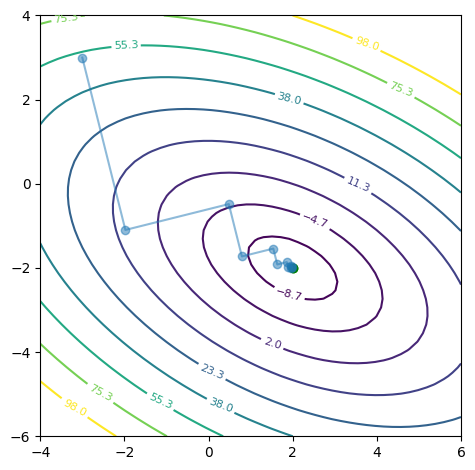

In [8]:
def plot_path(xs: np.ndarray):
    plot_loss()
    plt.plot(*xs.T, marker="o", alpha=0.5)
    plt.scatter(*solution, color="green")

plot_path(xs)
plt.show()

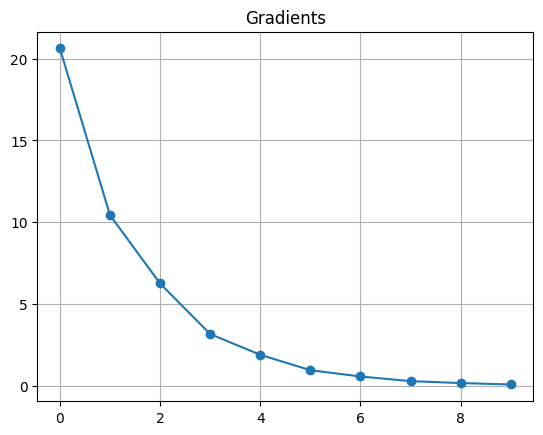

In [9]:
def plot_grad_norms(grads: np.ndarray):
    grad_norms = np.linalg.norm(grads, axis=1)
    plt.plot(grad_norms, marker="o")
    plt.grid()
    plt.title("Gradients")

plot_grad_norms(grads)

In [10]:
del x

# 2. Using Conjugate Gradients (CG)
CG starts with the gradient as the first direction of optimization, and then uses only "conjugate" directions to supplement the optimization. Two directions $p_1$ and $p_2$ are conjugate if $$ p_1^T A p_2 = 0 $$

This is the same as an inner product over $A$: $$ \langle p_1, p_2 \rangle_A $$

To find conjugate directions, we use a Gram-Schimdt orthonormalization.

In [11]:
def r(x):
    return b - A @ x

In [12]:
x = worst_case
r_ = r(x)
d = r_
delta_new = r_.T @ r_
delta_0 = delta_new
xs = [x]
grads = []
for _ in range(2):
    q = A @ d
    alpha = delta_new / (d.T @ q)
    x = x + alpha * d
    xs.append(x)
    grads.append(grad_f(x))
    r_ = r(x)
    delta_old = delta_new
    delta_new = r_.T @ r_
    beta = delta_new / delta_old
    d = r_ + beta * d

xs = np.array(xs)
grads = np.array(grads)

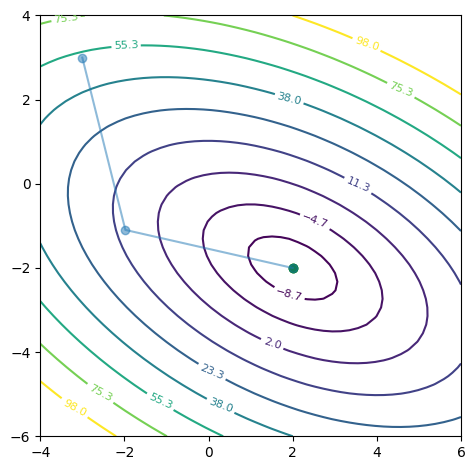

In [13]:
plot_path(xs)

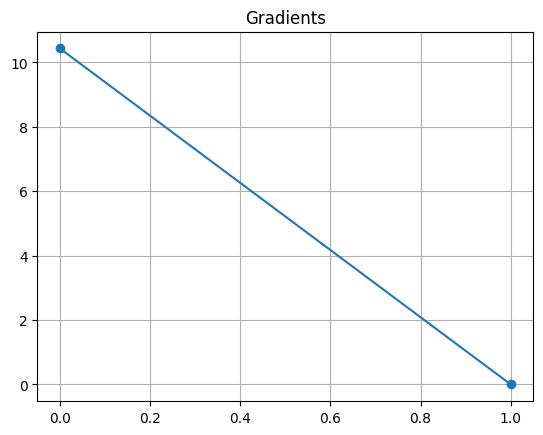

In [14]:
plot_grad_norms(grads)